In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 

# Context

Для иследования нам предоставлена набор данных о пассажирах Титаника. 
Набор данных, используемый для этого исследования, является синтетическим, но основан на реальном наборе данных (в данном случае, фактических данных Титаника!) и сгенерирован с использованием CTGAN.

Выполним загрузку данных из файла csv.

In [358]:
data_titanic = pd.read_csv("train.csv")

Посмотрим на сам набор данных для иследования и определим размер данного датасета.

In [359]:
data_titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C


Видим что в датасете содержится 100000 строк и 12 столбцов с данными о пассажирах.

Данные представлены следующими столбцами:

'PassengerId': Id пассажира

'Survived': Выжил пассажир или нет (0-не выжил, 1-выжил)

'Pclass': Класс билета (1 = Первый класс, 2 = Второй класс, 3 = Третий класс)

'Name': Имя пассажира

'Sex': Пол пассажира

'Age': Возраст в годах

'SibSp': Количество братьев и сестер/супругов на борту Титаника

'Parch': Родителей/детей на борту Титаника

'Ticket': Номер билета

'Fare': Цена билета пассажира

'Cabin': Номер кабины

'Embarked': Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

# Data quality assessment

Посмотрим для каждого столбца количество ненулевых значений и тип данных.

In [360]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Итак, у нас есть 5 полей типа int, 2 поля типа float, а остальные поля типа object. Приведенная выше информация очень поможет, когда мы применим различные вычисления на уровне столбца.

Ответим на пару вопросов:
    
    -в данных не имеется числовых значений в виде строк
    
    -не существует переменных, которые являются числовыми, но на самом деле должны быть категориальными

Проверим количество нулевых значений в нашем наборе по каждому столбцу.

In [361]:
data_titanic.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

Как видим есть некоторые столбцы в которых есть пропущенные данные (Age,Ticket,Fare,Cabin,Embarked).
Поступить можно по-разному и либо отбросить отсутствующие значения, если их немного, либо заполнить их средними или медианными значениями с помощью функции Pandas data.fillna().

Сделаем так с данными из столбца Age. Заполним пропущеные данные средними значениями по возрасту среди всех.

In [362]:
data_titanic['Age'].fillna((data_titanic['Age'].mean()), inplace=True)

Так же заполним пропущенные значения столбца Fare средними по цене. Но сделаем это в разрезе данных Pclass, так как можем заметить, что средняя цена на билет зависит от класса билета. Чем выше класс билета, тем выше будет цена на билет. 

In [363]:
data_titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    92.653113
2    25.756003
3    20.618226
Name: Fare, dtype: float64

Заполним пропуски в разрезе столбца Pclass

In [364]:
data_titanic['Fare'] = data_titanic.groupby('Pclass')['Fare'].apply(lambda x: x.fillna(x.mean()))

Проверим заполнилеись ли данные

In [365]:
data_titanic.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket          4623
Fare               0
Cabin          67866
Embarked         250
dtype: int64

Как видим пропущенные данные заполнились средними значениями.

Посмотрим на статистические результаты по числовым данным.

In [366]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.929065
std,28867.657797,0.494753,0.837727,18.009589,0.862566,0.950076,69.552036
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000
50%,49999.500000,0.000000,2.000000,38.355472,0.000000,0.000000,24.470000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.500000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


Глядя на эти данные можем сделать некоторые предварительные выводы по этим данным:

-средний возраст пассажиров на титанике составлял 38,35 лет

-максимальный возраст составлял 87 лет, а минимальный 0,08 лет (1 месяц) 

-средняя цена за билет составила 43,92 доллара

-максимальная цена за билет составила 744,66 доллара, а минимальная 68 центов

Посмотрим на статистические результаты по категориальным данным.

In [367]:
data_titanic.describe(include=[object]) 

,Name,Sex,Ticket,Cabin,Embarked
count,100000,100000,95377,32134,99750
unique,92144,2,75331,26992,3
top,"Johnson, John",male,A/5,C19828,S
freq,31,56114,602,6,72139


Глядя на эти данные можем сделать некоторые предварительные выводы по этим данным:

-в базе больше всего человек с именем Johnson, John, упоминается 31 раз

-на Титанике больше всего было мужчин, их было 56114

-больше всего человек село на Титаник в Саунгемптоне, их было 72139 человек

Проверим есть ли в наших данных дубликаты:

In [368]:
True in data_titanic.duplicated().to_numpy()

False

Дубликатов в базе обноружено не было.

# Data exploration

Исследовательский анализ данных можно разделить на 4 основных типа задач:

    -Исследование каждой отдельной переменной
    -Оценка взаимосвязи между каждой переменной и целевой переменной
    -Оценка взаимодействия между переменными
    -Исследование данных во многих измерениях

## Исследование каждой отдельной переменной

Начнем с исследования переменной Survived:

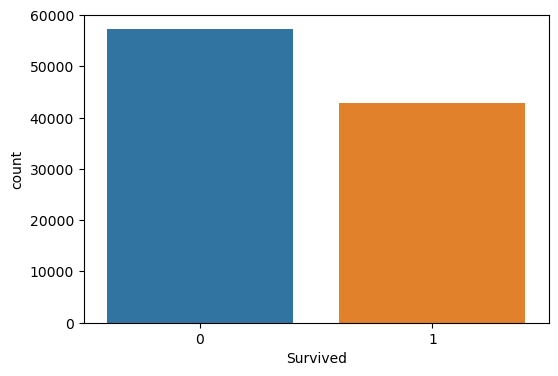

In [369]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Survived'])
plt.show()

Можем наблюдать что погибших было больше чем выживших.

Следующая переменная которую ислледуем будет Pclass:

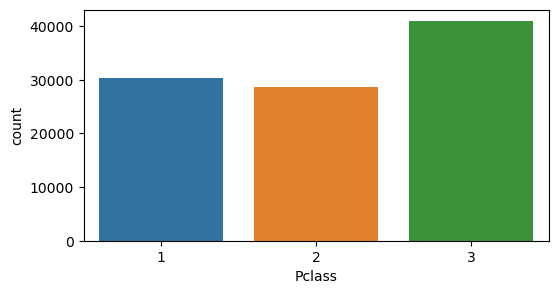

In [370]:
plt.figure(figsize=(6,3))
sns.countplot(x=data_titanic['Pclass'])
plt.show()

Можем заметить что больше всего пассажиров ехало в 3 Классе, и меньше всего во 2 Классе.

Следующая переменная которую ислледуем будет Sex:

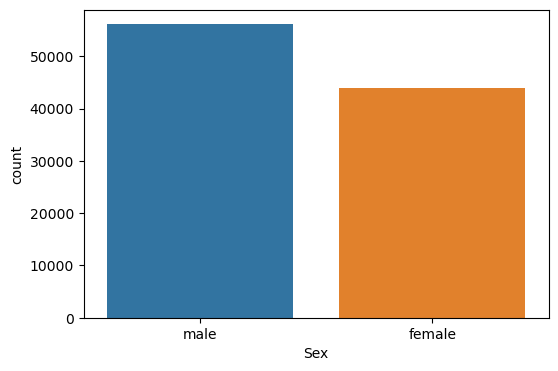

In [371]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Sex'])
plt.show()

Видим, что мужчин на Титанике было больше чем женщин

Следующая переменная которую ислледуем будет Age:
    
Построим гистограмму, распределение и boxplot, а так же посмотри статистические данные по переменной.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


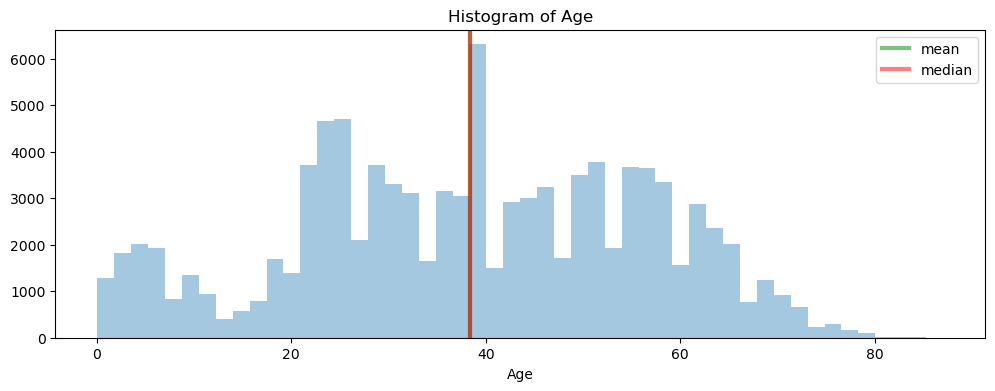

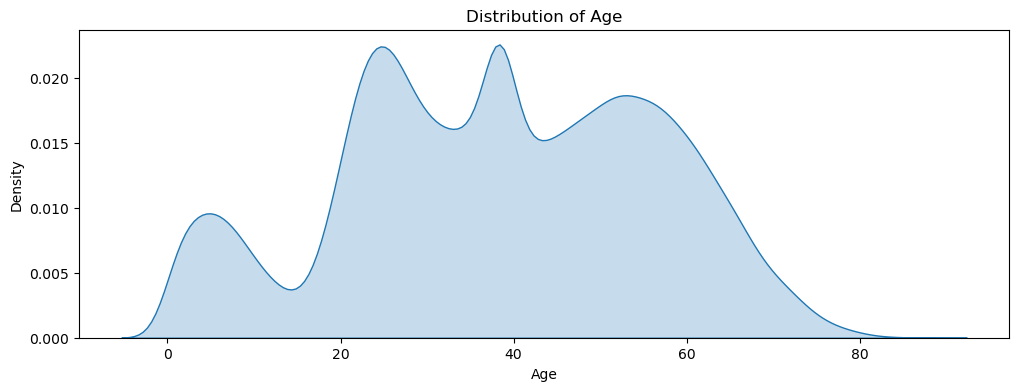

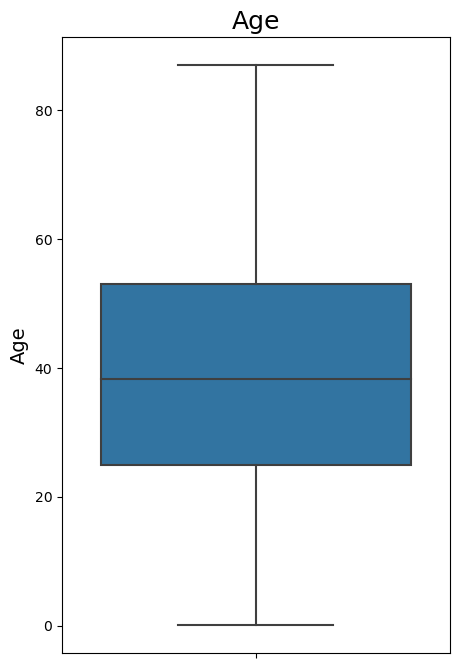

In [372]:
plt.figure(figsize=(12,4))
sns.distplot(a=data_titanic['Age'], kde=False)
plt.axvline(x=data_titanic.Age.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=data_titanic.Age.median(), linewidth=3, color='r', label="median", alpha=0.5)
plt.title("Histogram of Age")
plt.legend(["mean", "median"])
plt.show()
plt.figure(figsize=(12,4))
sns.kdeplot(data=data_titanic['Age'], shade=True)
plt.title("Distribution of Age")
plt.show()
plt.figure(figsize=(5, 8))
sns.boxplot(y="Age",data=data_titanic)
plt.ylabel("Age", size=14)
plt.title("Age", size=18)
plt.show()

In [373]:
data_titanic['Age'].agg(["min", "max", "var", "std",'mean','median'])

min         0.080000
max        87.000000
var       324.345295
std        18.009589
mean       38.355472
median     38.355472
Name: Age, dtype: float64

Видим что медиана среднее и мода равны одному значению и равны 38.355472 годам.

По распределению можем заменить что оно 4-х модальное.

Следующая переменная которую ислледуем будет SibSp:

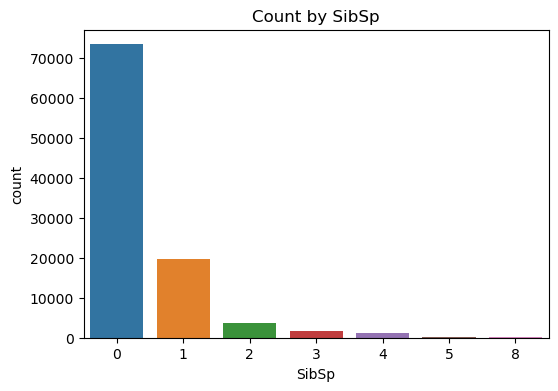

SibSp
0    73308
1    19758
2     3703
3     1635
4     1168
5      132
8      296
dtype: int64

In [374]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['SibSp'])
plt.title("Count by SibSp")
plt.show()
data_titanic.groupby('SibSp').size()

Можем наблюдать, что количество братьев и сестер/супругов на борту Титаника было максимально равно нулю, а минимально 5.

Следующая переменная которую ислледуем будет Parch.

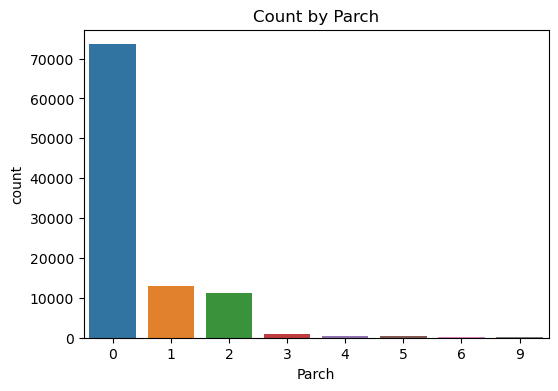

Parch
0    73540
1    12996
2    11236
3      983
4      446
5      331
6      204
9      264
dtype: int64

In [375]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Parch'])
plt.title("Count by Parch")
plt.show()
data_titanic.groupby('Parch').size()

Можем наблюдать, что родителей/детей на борту Титаника было максимально равно нулю, а минимально 6.

Следующая переменная которую ислледуем будет Fare:

Построим гистограмму, распределение и boxplot, а так же посмотри статистические данные по переменной.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


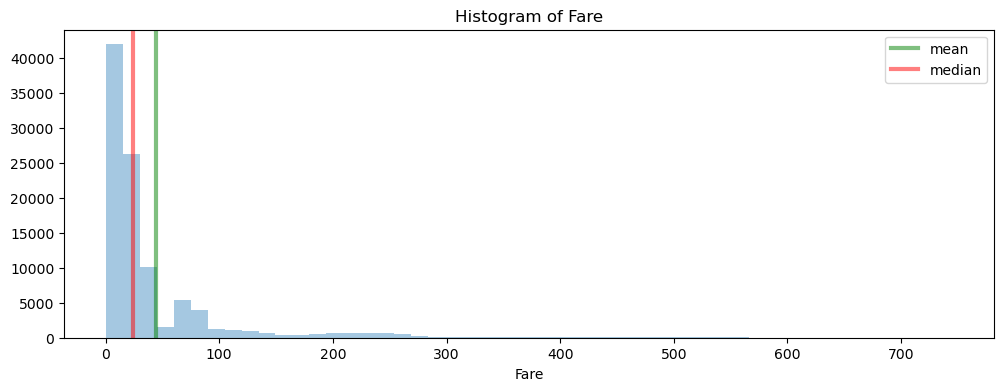

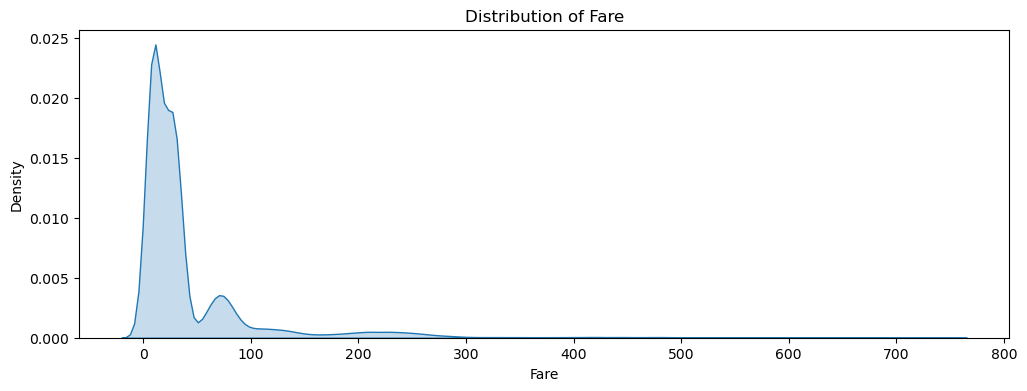

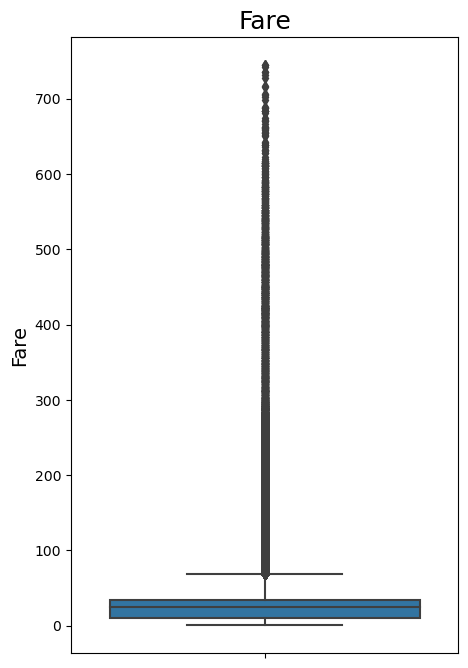

In [376]:
plt.figure(figsize=(12,4))
sns.distplot(a=data_titanic['Fare'], kde=False)
plt.axvline(x=data_titanic.Fare.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=data_titanic.Fare.median(), linewidth=3, color='r', label="median", alpha=0.5)
plt.title("Histogram of Fare")
plt.legend(["mean", "median"])
plt.show()
plt.figure(figsize=(12,4))
sns.kdeplot(data=data_titanic['Fare'], shade=True)
plt.title("Distribution of Fare")
plt.show()
plt.figure(figsize=(5, 8))
sns.boxplot(y="Fare",data=data_titanic)
plt.ylabel("Fare", size=14)
plt.title("Fare", size=18)
plt.show()

In [377]:
data_titanic['Fare'].agg(["min", "max", "var", "std",'mean','median'])

min          0.680000
max        744.660000
var       4837.485681
std         69.552036
mean        43.929065
median      24.470000
Name: Fare, dtype: float64

Можем заметить, что медиана меньше среднего и равны соотвественно 24,47 и 43,92 доллара.

Максимальная цена равно 744,66 доллара, а минимальная 68 центов.

Распределение имеет positive skewness.

Следующая переменная которую ислледуем будет Cabin. Мы возьмем первую букву кабины пассажира для оценки.

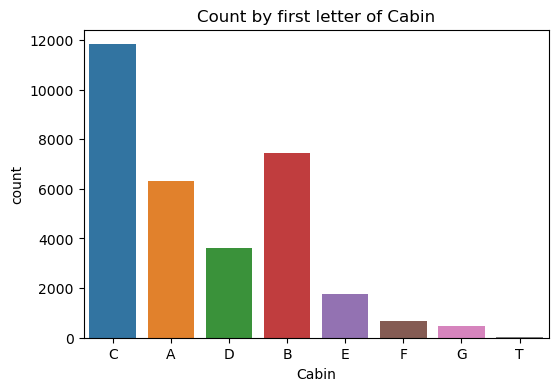

In [378]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Cabin'].str[:1])
plt.title("Count by first letter of Cabin")
plt.show()

Можем наблюдать, что больше всего человек жили в кабине с буквой С и меньше всего с кабиной с буквой T.

Следующая переменная которую ислледуем будет Embarked.

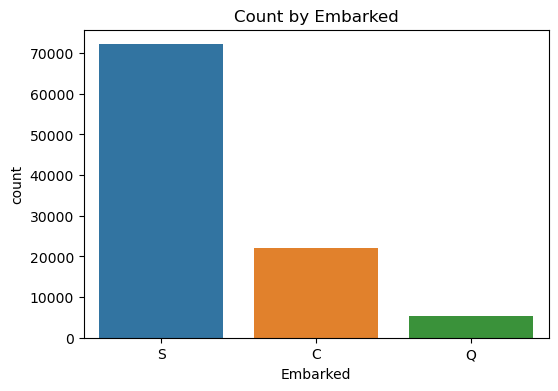

In [379]:
plt.figure(figsize=(6,4))
sns.countplot(x=data_titanic['Embarked'])
plt.title("Count by Embarked")
plt.show()

Можем наблюдать, что больше всего пассажиров отправились из Саунгемптона, а меньше всего из Квинстона.

In [380]:
#plt.figure(figsize=(30,30))
#plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")
#sns.countplot(x=data_titanic['Sex'], hue=data_titanic['Survived'])
#plt.show()
#sns.distplot(a=data_titanic['Age'], kde=False)
#plt.show()
#plt.figure(figsize=(15,15))
#sns.regplot(x=data_titanic['Age'], y=data_titanic['Fare'])
#sns.distplot(a=data_titanic['Fare'], kde=False)
#plt.show()

# Summary

In [381]:
data

NameError: name 'data' is not defined